# Extração das features relevantes para o modelo de ML de previsão do estado de fadiga de seres humanos

Este documento visa extrair dos dados crus um csv com as features que serão utilizadas no modelo de ML em seguida

## Features desejadas

- Taxa de piscadas (piscadas/min)
- Taxa de bocejo (bocejo/min)
- Perclos (%)
- EAR (%)
- Duração de piscadas

# Calibração

Nesta etapa buscamos verificar e armazenar, para cada individuo do dataset de treinamento, o estado "normal" ou "alerta". Com base nestes valores, poderemos inferir a ocorrência de piscadas, bocejos, perclos, duração de piscadas e porcentagem de EAR.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# arquivo de armazenamento dos dados filtrados: dados_limpos.csv
df = pd.read_csv('dados_limpos.csv', usecols=[1,2,3])

In [5]:
df.head()

,ear,distancia_entre_os_labios,nome_video
0,0.256233,11.833333,57/0.MOV
1,0.268594,12.833333,57/0.MOV
2,0.274373,12.333333,57/0.MOV
3,0.276279,12.333333,57/0.MOV
4,0.285465,11.000000,57/0.MOV


# Retirando ruídos dos dados para Piscadas

In [6]:
ear = df['ear']
dist = df['distancia_entre_os_labios']

In [11]:
from skimage.morphology import reconstruction

ear_rec = reconstruction(ear - 0.10, ear, selem = np.ones((11,)))

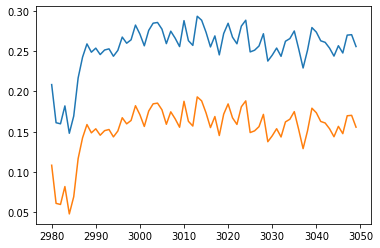

In [12]:
plt.figure()
plt.plot(ear[2980:3050])
plt.plot(ear[2980:3050]- 0.10)
plt.show()

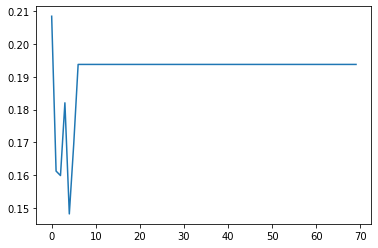

In [13]:
plt.plot(ear_rec[2980:3050])

In [ ]:
median()

In [14]:
pd.unique(df.nome_video)

array(['57/0.MOV', '57/10.MOV', '57/5.MOV', '59/0.MOV', '59/10.MOV',
       '59/5.MOV', '60/0.mov', '60/10.mov', '60/5.mov', '01/0.mov',
       '01/10.MOV', '01/5.mov', '03/0.MOV', '03/10.mov', '03/5.mov',
       '04/0.mp4', '04/10.mp4', '04/5.mp4', '09/0.mp4', '09/10.mp4',
       '09/5.mp4', '10/0.MOV', '10/10.MOV', '10/5.MOV', '11/0.mp4',
       '11/10.mp4', '11/5.mp4', '12/0.mp4', '12/10.mp4', '12/5.mp4',
       '14/10.mp4', '14/5.mp4', '16/0.MOV', '16/10.MOV', '16/5.MOV',
       '17/0.mp4', '17/10.mp4', '17/5.mp4', '18/0.mov', '18/10.mov',
       '18/5.mov', '20/0.mp4', '20/5.MOV', '22/0.MOV', '22/10.MOV',
       '22/5.MOV', '24/0.mp4', '24/10.mp4', '24/5.mp4', '28/0.MOV',
       '28/10.MOV', '28/5.MOV', '29/0.mp4', '29/10.mp4', '29/5.mp4',
       '32/0.mp4', '32/10_1.mp4', '32/10_2.mp4', '32/5.mp4', '34/0.mov',
       '34/10.mp4', '34/5.mov', '35/0.mp4', '35/10.mp4', '35/5.mp4',
       '36/0.mp4', '36/10.mp4', '36/5.mp4', '37/0.mov', '37/10.mov',
       '37/5.mov', '39/0.MP4', '39

In [15]:
pasta1 = df.query('nome_video == "01/0.mov"')
pasta1

,ear,distancia_entre_os_labios,nome_video
158746,0.353980,20.500000,01/0.mov
158747,0.352951,19.833333,01/0.mov
158748,0.358248,19.500000,01/0.mov
158749,0.350738,22.000000,01/0.mov
158750,0.344019,21.000000,01/0.mov
...,...,...,...
175645,0.319543,17.666667,01/0.mov
175646,0.334691,15.333333,01/0.mov
175647,0.321973,16.333333,01/0.mov
175648,0.334352,16.166667,01/0.mov


In [27]:
ear_porc = 100*pasta1.ear/np.median(pasta1.ear[:601])
ear_porc

158746    91.887733
158747    91.620531
158748    92.995566
158749    91.046002
158750    89.301834
            ...    
175645    82.948307
175646    86.880390
175647    83.579166
175648    86.792618
175649    84.087584
Name: ear, Length: 16904, dtype: float64

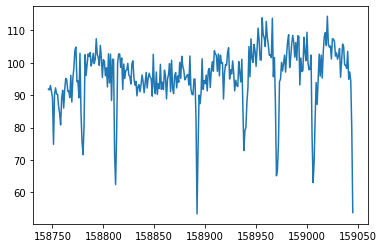

In [24]:
plt.plot(ear_porc[:300])

In [31]:
pasta1['EAR %'] = ear_porc

C:\Users\rebsm\anaconda3\envs\env-tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
pasta1

,ear,distancia_entre_os_labios,nome_video,EAR %
158746,0.353980,20.500000,01/0.mov,91.887733
158747,0.352951,19.833333,01/0.mov,91.620531
158748,0.358248,19.500000,01/0.mov,92.995566
158749,0.350738,22.000000,01/0.mov,91.046002
158750,0.344019,21.000000,01/0.mov,89.301834
...,...,...,...,...
175645,0.319543,17.666667,01/0.mov,82.948307
175646,0.334691,15.333333,01/0.mov,86.880390
175647,0.321973,16.333333,01/0.mov,83.579166
175648,0.334352,16.166667,01/0.mov,86.792618


In [39]:
videos = pd.unique(df.nome_video)
videos 

array(['57/0.MOV', '57/10.MOV', '57/5.MOV', '59/0.MOV', '59/10.MOV',
       '59/5.MOV', '60/0.mov', '60/10.mov', '60/5.mov', '01/0.mov',
       '01/10.MOV', '01/5.mov', '03/0.MOV', '03/10.mov', '03/5.mov',
       '04/0.mp4', '04/10.mp4', '04/5.mp4', '09/0.mp4', '09/10.mp4',
       '09/5.mp4', '10/0.MOV', '10/10.MOV', '10/5.MOV', '11/0.mp4',
       '11/10.mp4', '11/5.mp4', '12/0.mp4', '12/10.mp4', '12/5.mp4',
       '14/10.mp4', '14/5.mp4', '16/0.MOV', '16/10.MOV', '16/5.MOV',
       '17/0.mp4', '17/10.mp4', '17/5.mp4', '18/0.mov', '18/10.mov',
       '18/5.mov', '20/0.mp4', '20/5.MOV', '22/0.MOV', '22/10.MOV',
       '22/5.MOV', '24/0.mp4', '24/10.mp4', '24/5.mp4', '28/0.MOV',
       '28/10.MOV', '28/5.MOV', '29/0.mp4', '29/10.mp4', '29/5.mp4',
       '32/0.mp4', '32/10_1.mp4', '32/10_2.mp4', '32/5.mp4', '34/0.mov',
       '34/10.mp4', '34/5.mov', '35/0.mp4', '35/10.mp4', '35/5.mp4',
       '36/0.mp4', '36/10.mp4', '36/5.mp4', '37/0.mov', '37/10.mov',
       '37/5.mov', '39/0.MP4', '39

In [ ]:
Y = []
for count, video in enumerate(sorted(videos)):
    pasta_do_video = video.split('/')
    if pasta_do_video[1][:2] == '0.':
        y = np.where(df.nome_video == video, 0, False)
        print(y)
    elif pasta_do_video[1][:2] == '5.':
        y = np.where(df.nome_video == video, 1, False)
        print(y)
    elif pasta_do_video[1][:3] == '10.':
        y = np.where(df.nome_video == video, 2, False)
    Y.append(list(y))

In [51]:
Y[16]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
df['y'] = Y

ValueError: Length of values does not match length of index